In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv('emotion_sentimen_dataset.csv', index_col=0)


In [56]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     500 non-null    object
 1   Emotion  500 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB
None
                                                     text  Emotion
count                                                 500      500
unique                                                500       11
top     i seriously hate one subject to death but now ...  neutral
freq                                                    1      426
                                                         text  Emotion
Unnamed: 0                                                            
0           i seriously hate one subject to death but now ...     hate
1                          im so full of life i feel appalled  neutral
2           i sit here to write i start to dig out my feel...  neutral
3           ive b

In [57]:
# Replace 'column_name' with the name of your column
unique_values = df['Emotion'].unique()
print(unique_values)

['hate' 'neutral' 'anger' 'love' 'worry' 'relief' 'happiness' 'fun'
 'empty' 'enthusiasm' 'sadness']


Text(0.5, 1.0, 'Emotion Distribution')

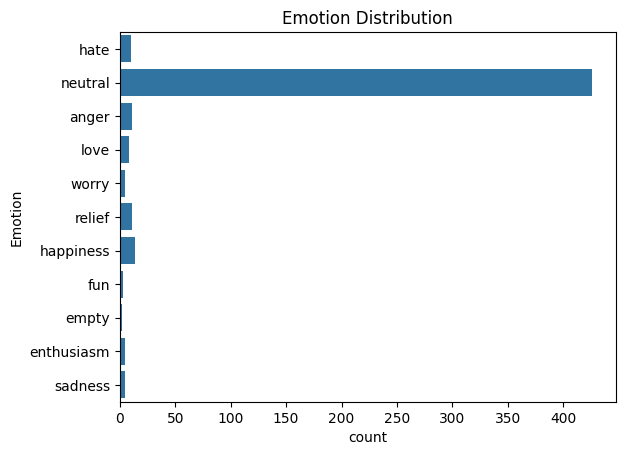

In [58]:
import seaborn as sns
sns.countplot(data = df, y = 'Emotion').set_title("Emotion Distribution")

In [43]:
import tf_keras as keras
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

In [44]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [59]:
df.drop(['Emotion'], axis=1, inplace=True)

In [60]:
print(df.head())

                                                         text
Unnamed: 0                                                   
0           i seriously hate one subject to death but now ...
1                          im so full of life i feel appalled
2           i sit here to write i start to dig out my feel...
3           ive been really angry with r and i feel like a...
4           i feel suspicious if there is no one outside l...


In [61]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [62]:
df['text'][1:10].apply(get_emotion_label)

Unnamed: 0
1         fear
2         fear
3        anger
4     surprise
5       desire
6         fear
7         fear
8    annoyance
9          joy
Name: text, dtype: object

In [63]:
df['emotion'] = df['text'].apply(get_emotion_label)

Text(0.5, 1.0, 'Emotion Distribution')

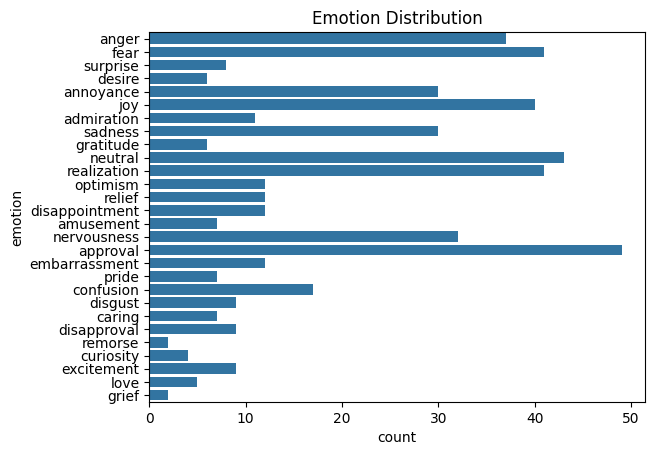

In [64]:
sns.countplot(data = df, y = 'emotion').set_title("Emotion Distribution")

In [65]:
df.to_csv('emotion_analysis_output.csv', index=False)